## Import the Python Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score , mean_squared_error
from sklearn import metrics
import sys
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Statistics
from scipy import stats
from scipy.stats import norm, skew 


In [4]:
surprise_house_price = pd.read_csv('train.csv') 

In [5]:
surprise_house_price.shape

(1460, 81)

In [6]:
surprise_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
surprise_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
surprise_house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
surprise_house_price.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking the dataset for the amount of nulls present¶

In [10]:
# Check if any null values are present in the data
surprise_house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Checking the number of missing values and its percentage

In [11]:
Total_missing = surprise_house_price.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*surprise_house_price.isnull().sum()/surprise_house_price.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000


### Checking how many columns have more than 45% of missing data

In [12]:
round(surprise_house_price.isnull().sum()/len(surprise_house_price.index),2)[round(surprise_house_price.isnull().sum()/
                                                                 len(surprise_house_price.index),2).values>0.45]

Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

#### Create a new dataframe named df_cleaned with all columns with data missing < 45% for our  further analysis

In [13]:
surprise_house_price = surprise_house_price.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [14]:
surprise_house_price.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,2008,WD,Normal,250000


In [15]:
#Checking the no of unique values in each column
surprise_house_price.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MiscVal            21
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

## DATA IMPUTATION FOR CATEGORICAL COLUMNS

### GarageQual: Garage quality

   Ex   Excellent
   Gd   Good
   TA   Typical/Average
   Fa   Fair
   Po   Poor
   NA   No Garage

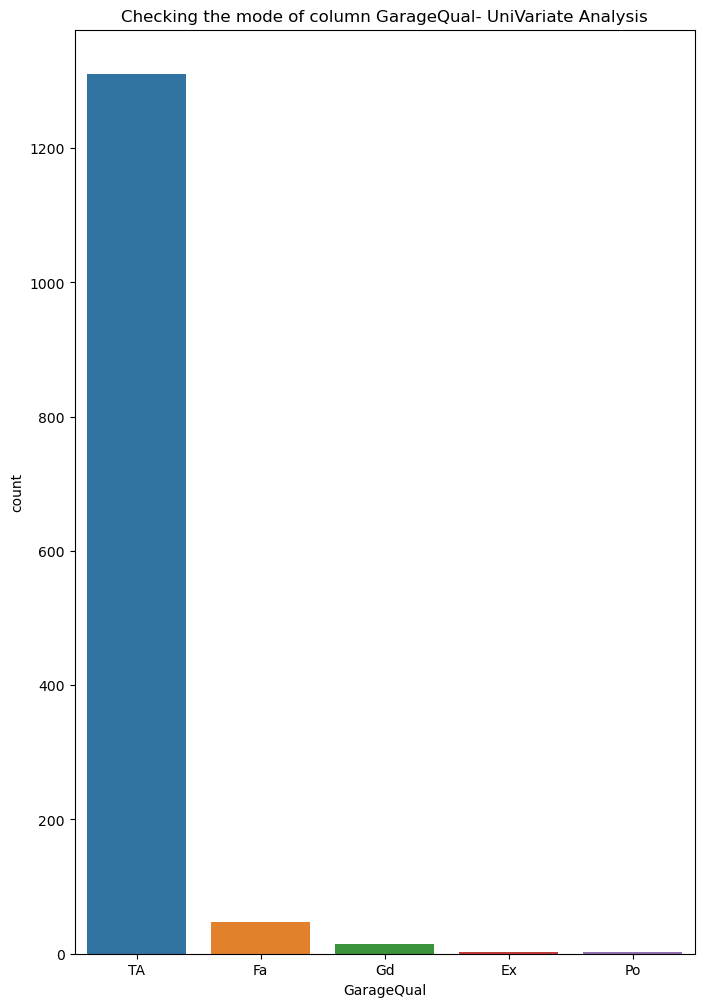

In [16]:
# Data imputation for column 'GarageQual'

plt.figure(figsize=(8,12))
sns.countplot(surprise_house_price.GarageQual)
plt.title("Checking the mode of column GarageQual- UniVariate Analysis")
plt.show()

In [17]:
surprise_house_price.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [18]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
surprise_house_price['GarageQual'] = surprise_house_price['GarageQual'].replace(np.nan,'TA')


In [19]:
surprise_house_price['GarageQual'].dtype

dtype('O')

In [20]:
surprise_house_price.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

### GarageFinish: Interior finish of the garage

   Fin  Finished
   RFn  Rough Finished  
   Unf  Unfinished
   NA   No Garage

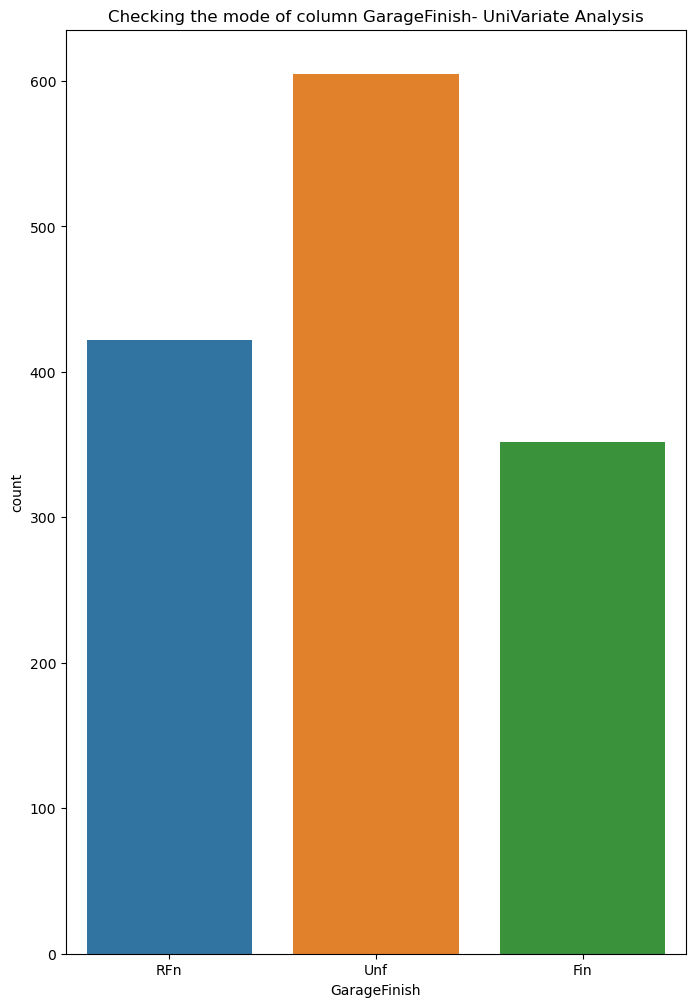

In [21]:
# Data imputation for column 'GarageFinish'

plt.figure(figsize=(8,12))
sns.countplot(surprise_house_price.GarageFinish)
plt.title("Checking the mode of column GarageFinish- UniVariate Analysis")
plt.show()

In [22]:
surprise_house_price.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

## As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown

In [23]:
surprise_house_price['GarageFinish']=surprise_house_price['GarageFinish'].replace(np.nan,'Unknown')

In [24]:
surprise_house_price.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

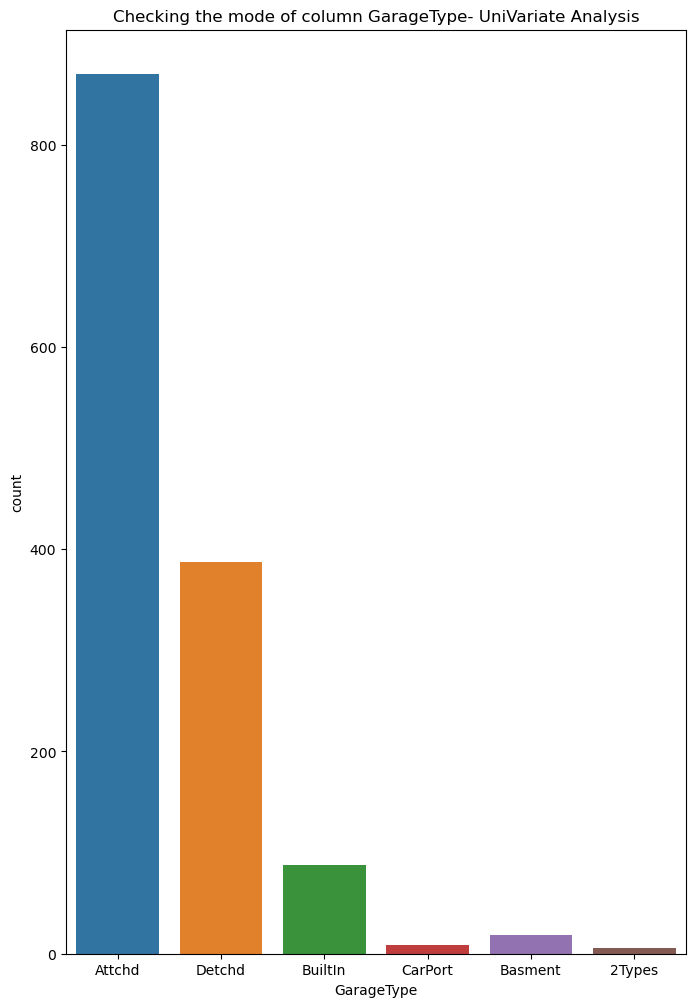

In [25]:
# Data imputation for column 'GarageType'

plt.figure(figsize=(8,12))
sns.countplot(surprise_house_price.GarageType)
plt.title("Checking the mode of column GarageType- UniVariate Analysis")
plt.show()

In [26]:
surprise_house_price.GarageType.value_counts()


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
surprise_house_price['GarageType'] = surprise_house_price['GarageType'].replace(np.nan,'Attchd')

In [28]:
surprise_house_price.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

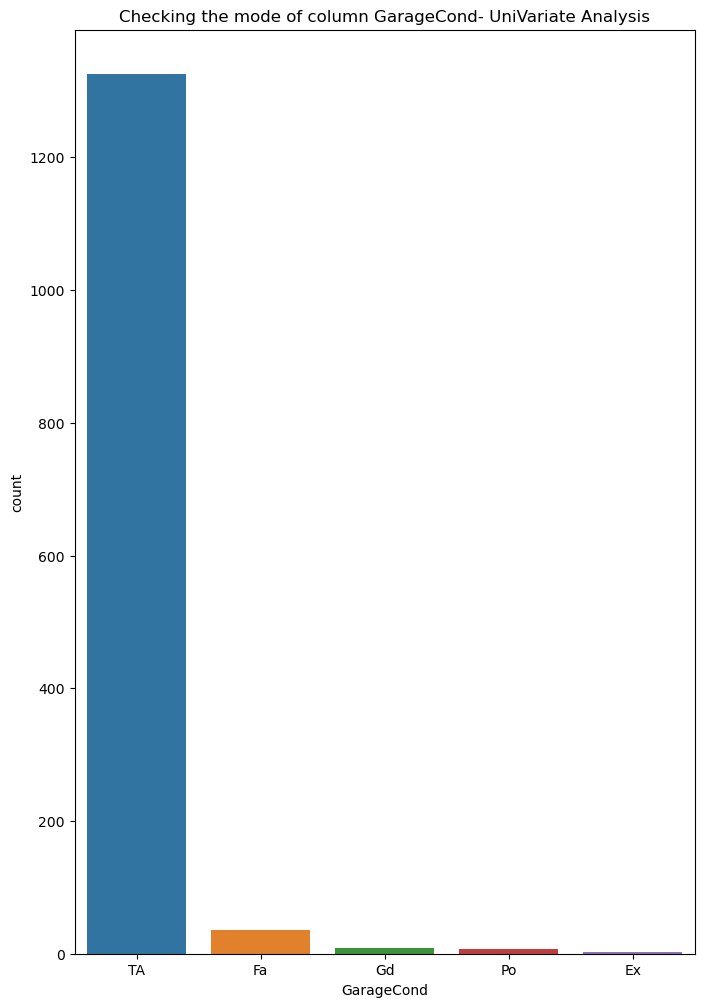

In [29]:
# Data imputation for column 'GarageCond'

plt.figure(figsize=(8,12))
sns.countplot(surprise_house_price.GarageCond)
plt.title("Checking the mode of column GarageCond- UniVariate Analysis")
plt.show()

In [30]:
surprise_house_price.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [31]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
surprise_house_price['GarageCond'] = surprise_house_price['GarageCond'].replace(np.nan,'TA')

In [32]:
surprise_house_price.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

## DATA IMPUTATION FOR NUMERICAL COLUMNS

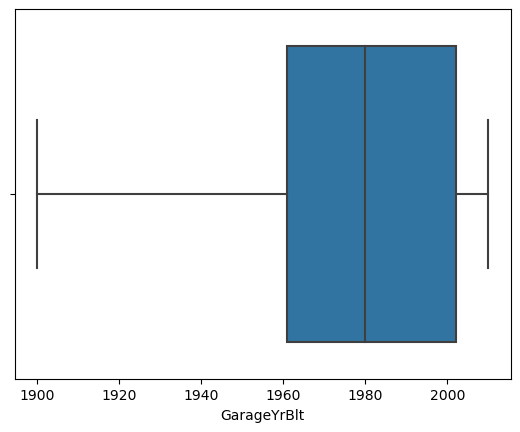

In [33]:
#PLots for outlier analysis of GarageYrBlt
sns.boxplot(surprise_house_price.GarageYrBlt)
plt.show()

There are no outiers so imputing missing values with mean

In [34]:
surprise_house_price['GarageYrBlt'].fillna(surprise_house_price['GarageYrBlt'].mean(),inplace=True)

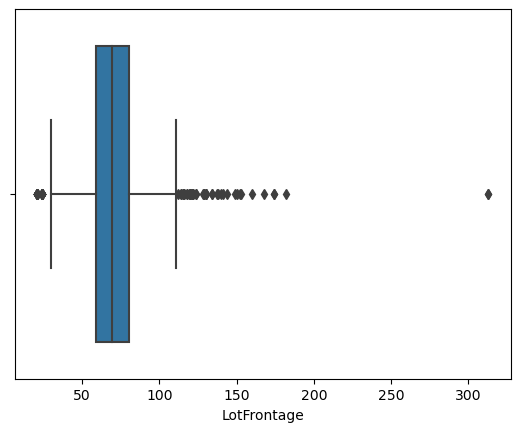

In [35]:
#PLots for outlier analysis for LotFrontage
sns.boxplot(surprise_house_price.LotFrontage)
plt.show()

As there are outliers imputing with median

In [36]:
surprise_house_price['LotFrontage'].fillna(surprise_house_price['LotFrontage'].median(),inplace=True)

### As the other columns have less than 3% of Nan Values we chose to drop those rows .

In [37]:
surprise_house_price.dropna(inplace=True)

In [38]:
#Final check of missing values 
Total_missing = surprise_house_price.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*surprise_house_price.isnull().sum()/surprise_house_price.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
Id,0,0.0
GarageType,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
...,...,...
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0
RoofMatl,0,0.0


### All missing values are handled!

## Data Exploration - Exploratory data analysis

In [39]:
surprise_house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [40]:
surprise_house_price['Age']=surprise_house_price['YrSold']-surprise_house_price['YearRemodAdd']
surprise_house_price['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [41]:
surprise_house_price=surprise_house_price.drop(['YrSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [42]:
surprise_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


In [43]:
Dropping the id as it does not give any infomration

SyntaxError: invalid syntax (1256372841.py, line 1)

In [44]:
surprise_house_price=surprise_house_price.drop(['Id'], axis = 1) 

### Numerical columns of our data set

In [45]:
numeric_feats = surprise_house_price.dtypes[surprise_house_price.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

### Univariate analysis of numerical columns

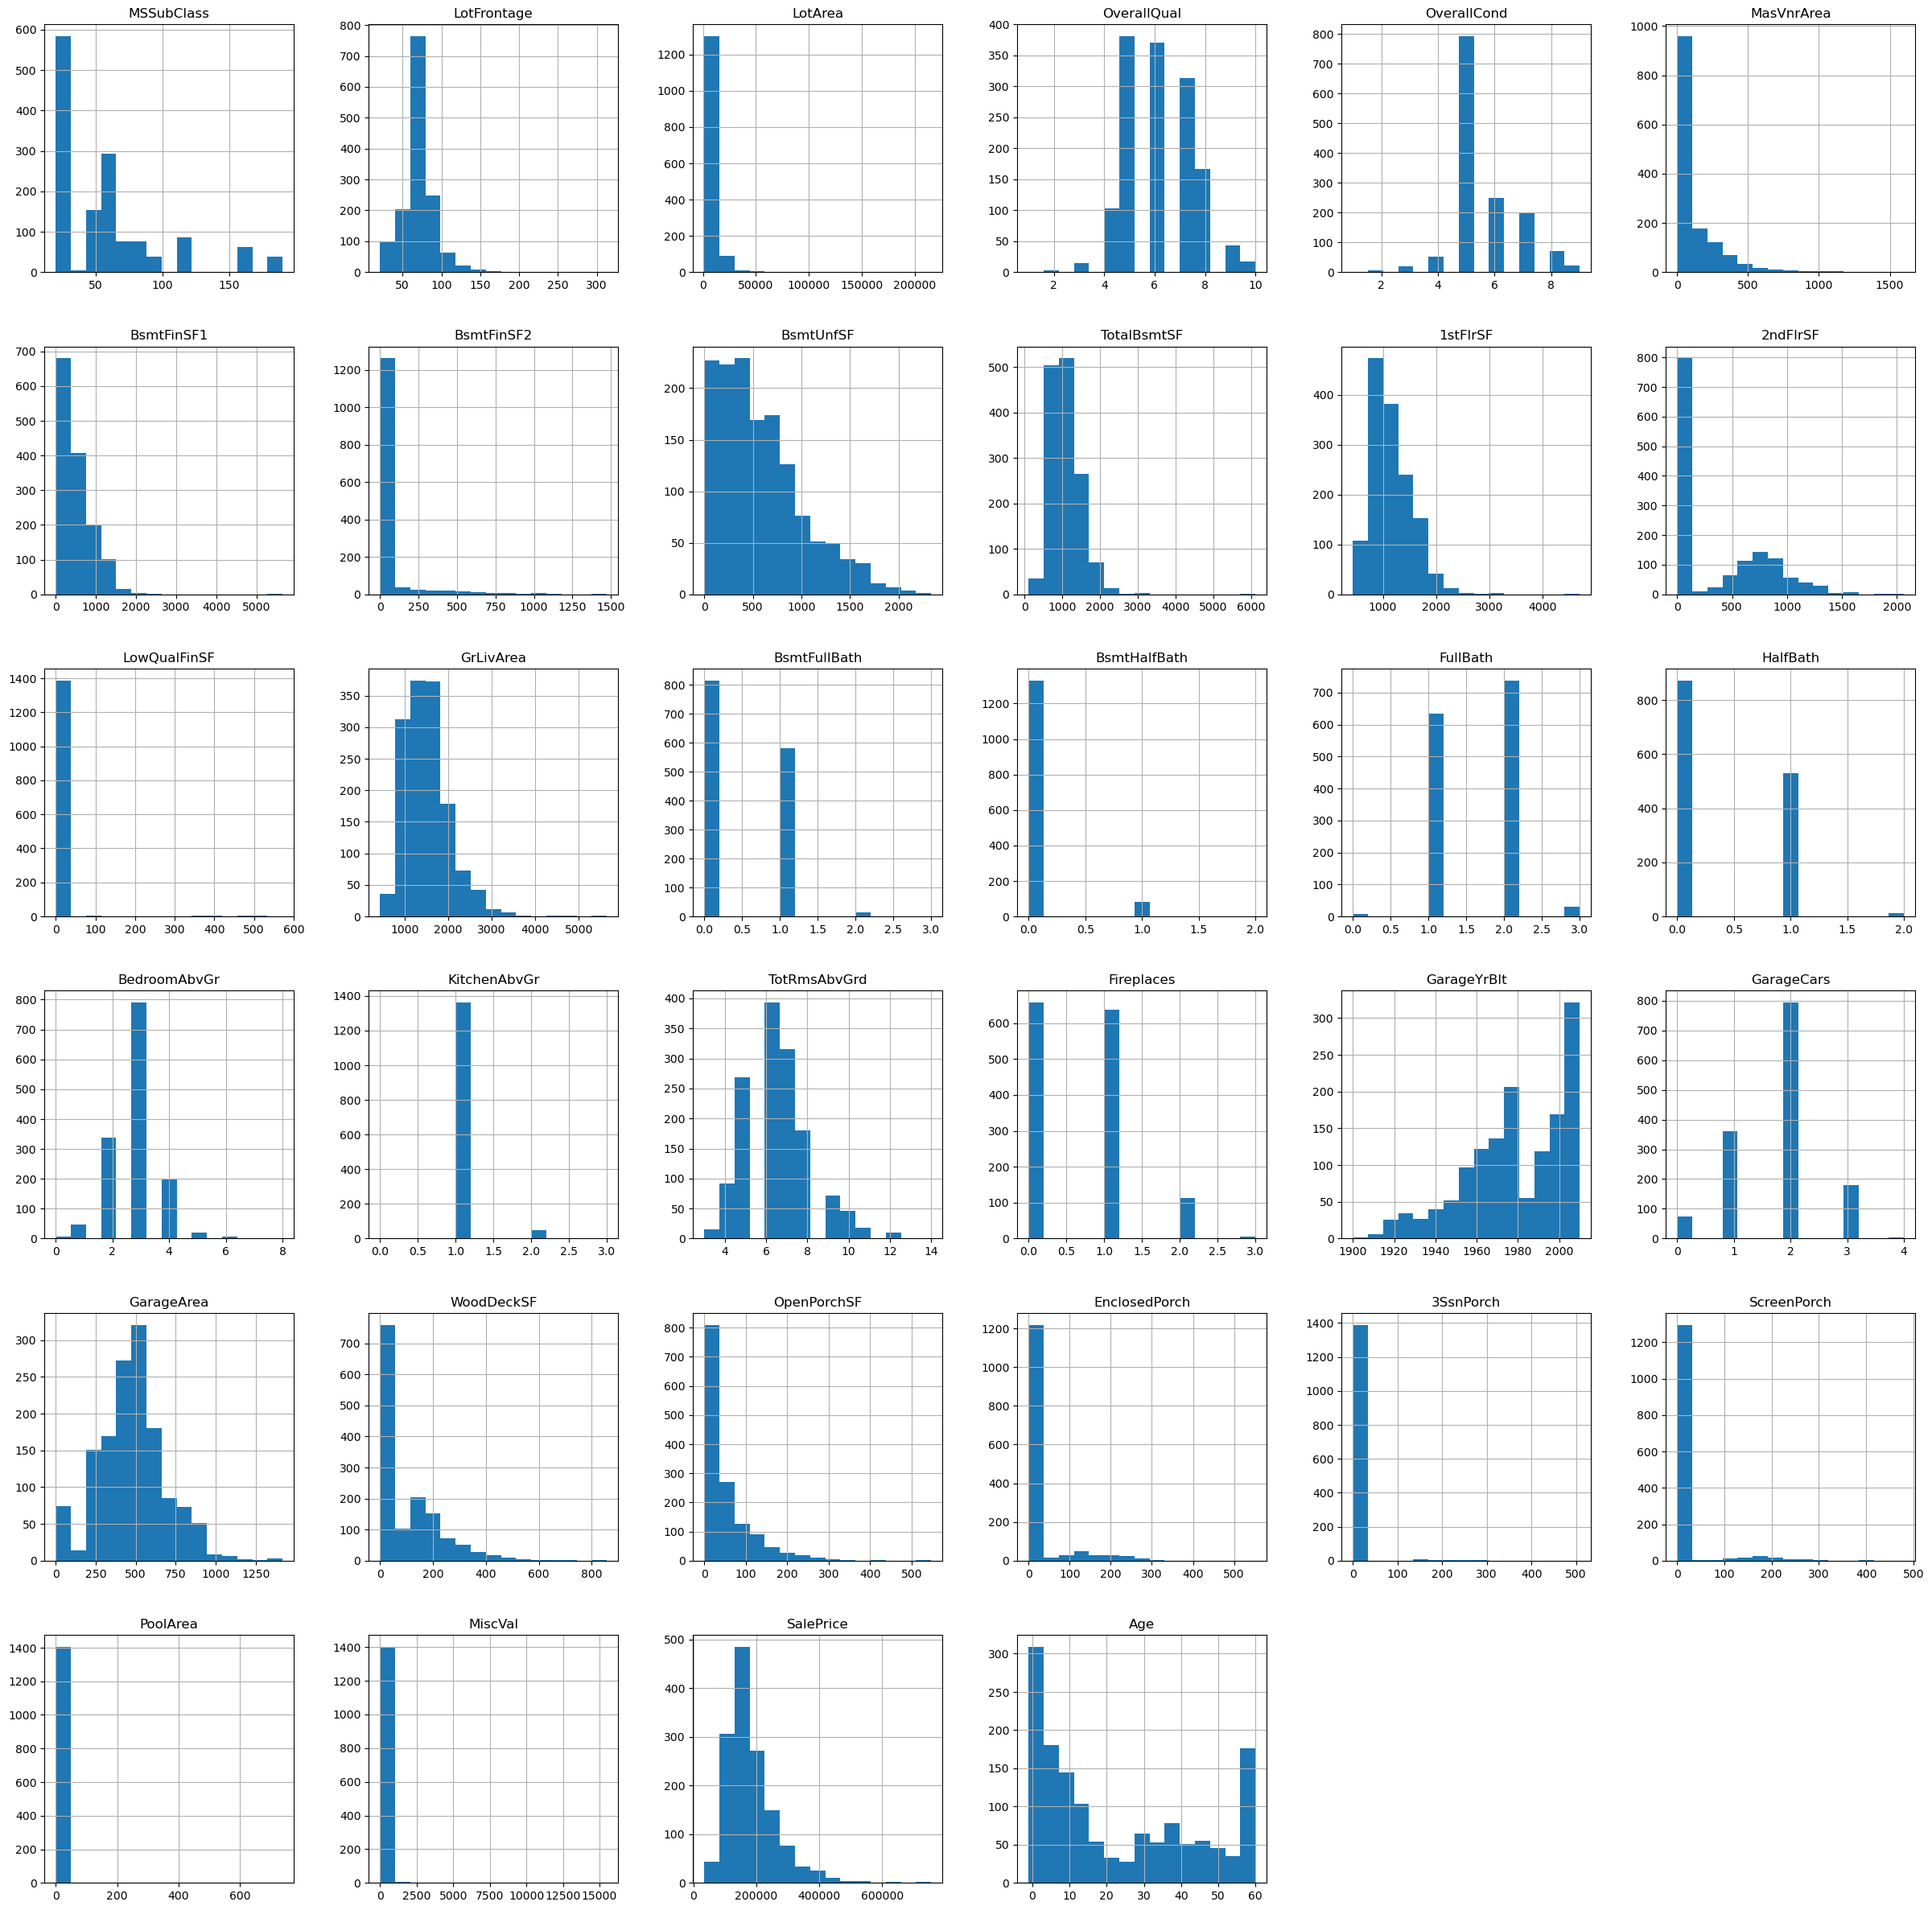

In [46]:
surprise_house_price[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

### We see that few variables are highly skewed and there might be possiblity that they can be coralted with each other as well which is This is very difficlut to interpret from univairate analysis

In [47]:
# correlation matrix
cor = surprise_house_price.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


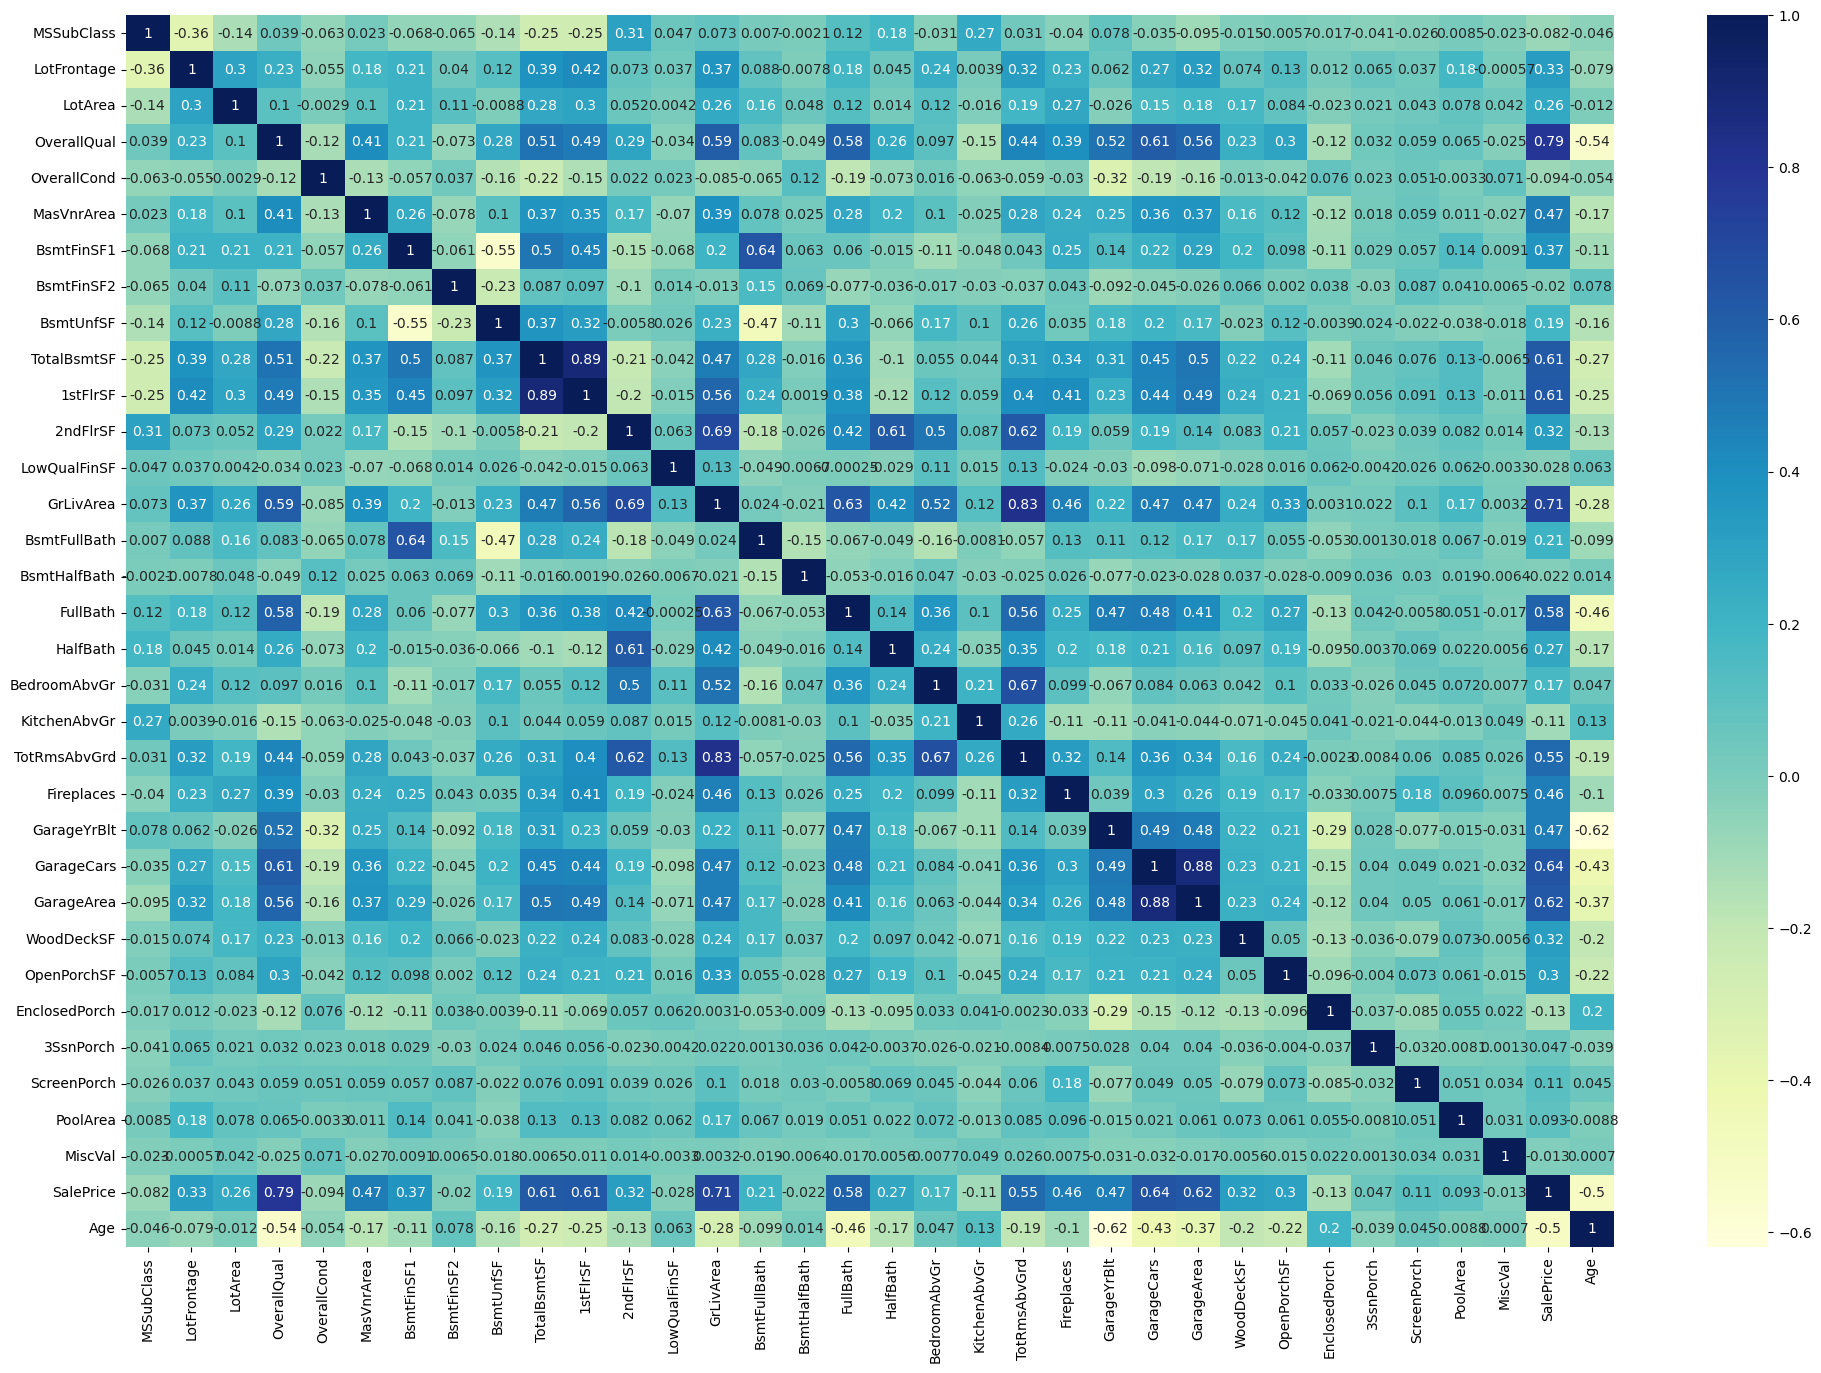

In [48]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor,cmap="YlGnBu",annot=True)
plt.show()

Inferences: Based on the correlation we can make few following interpretions

SalePrice is very high positively correlated to the Overall Quality(0.79)
SalePrice is very high positively correlated to the 1stFlrSF (0.61)
SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
SalePrice is very high positively correlated to the GrLivArea (0.71)
SalePrice is very high positively correlated to the FullBath(0.58)
SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
SalePrice is very high positively correlated to the GarageCars(0.64)
SalePrice is very high positively correlated to the GarageAre(0.62)
SalePrice is very high negatively correlated to the Age(-0.5)

#### The above variables are top ten correlated.

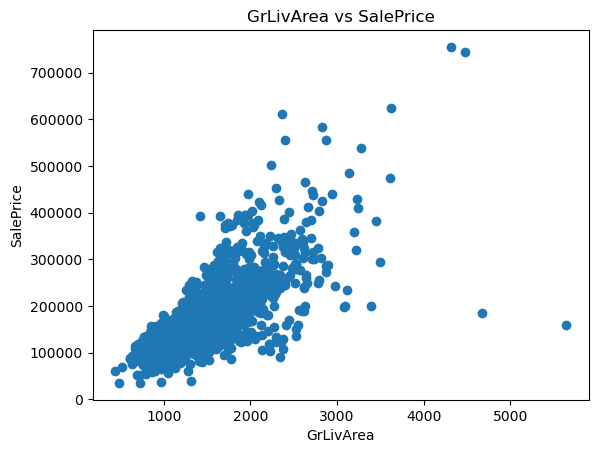

In [49]:
plt.scatter(surprise_house_price.GrLivArea,surprise_house_price.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

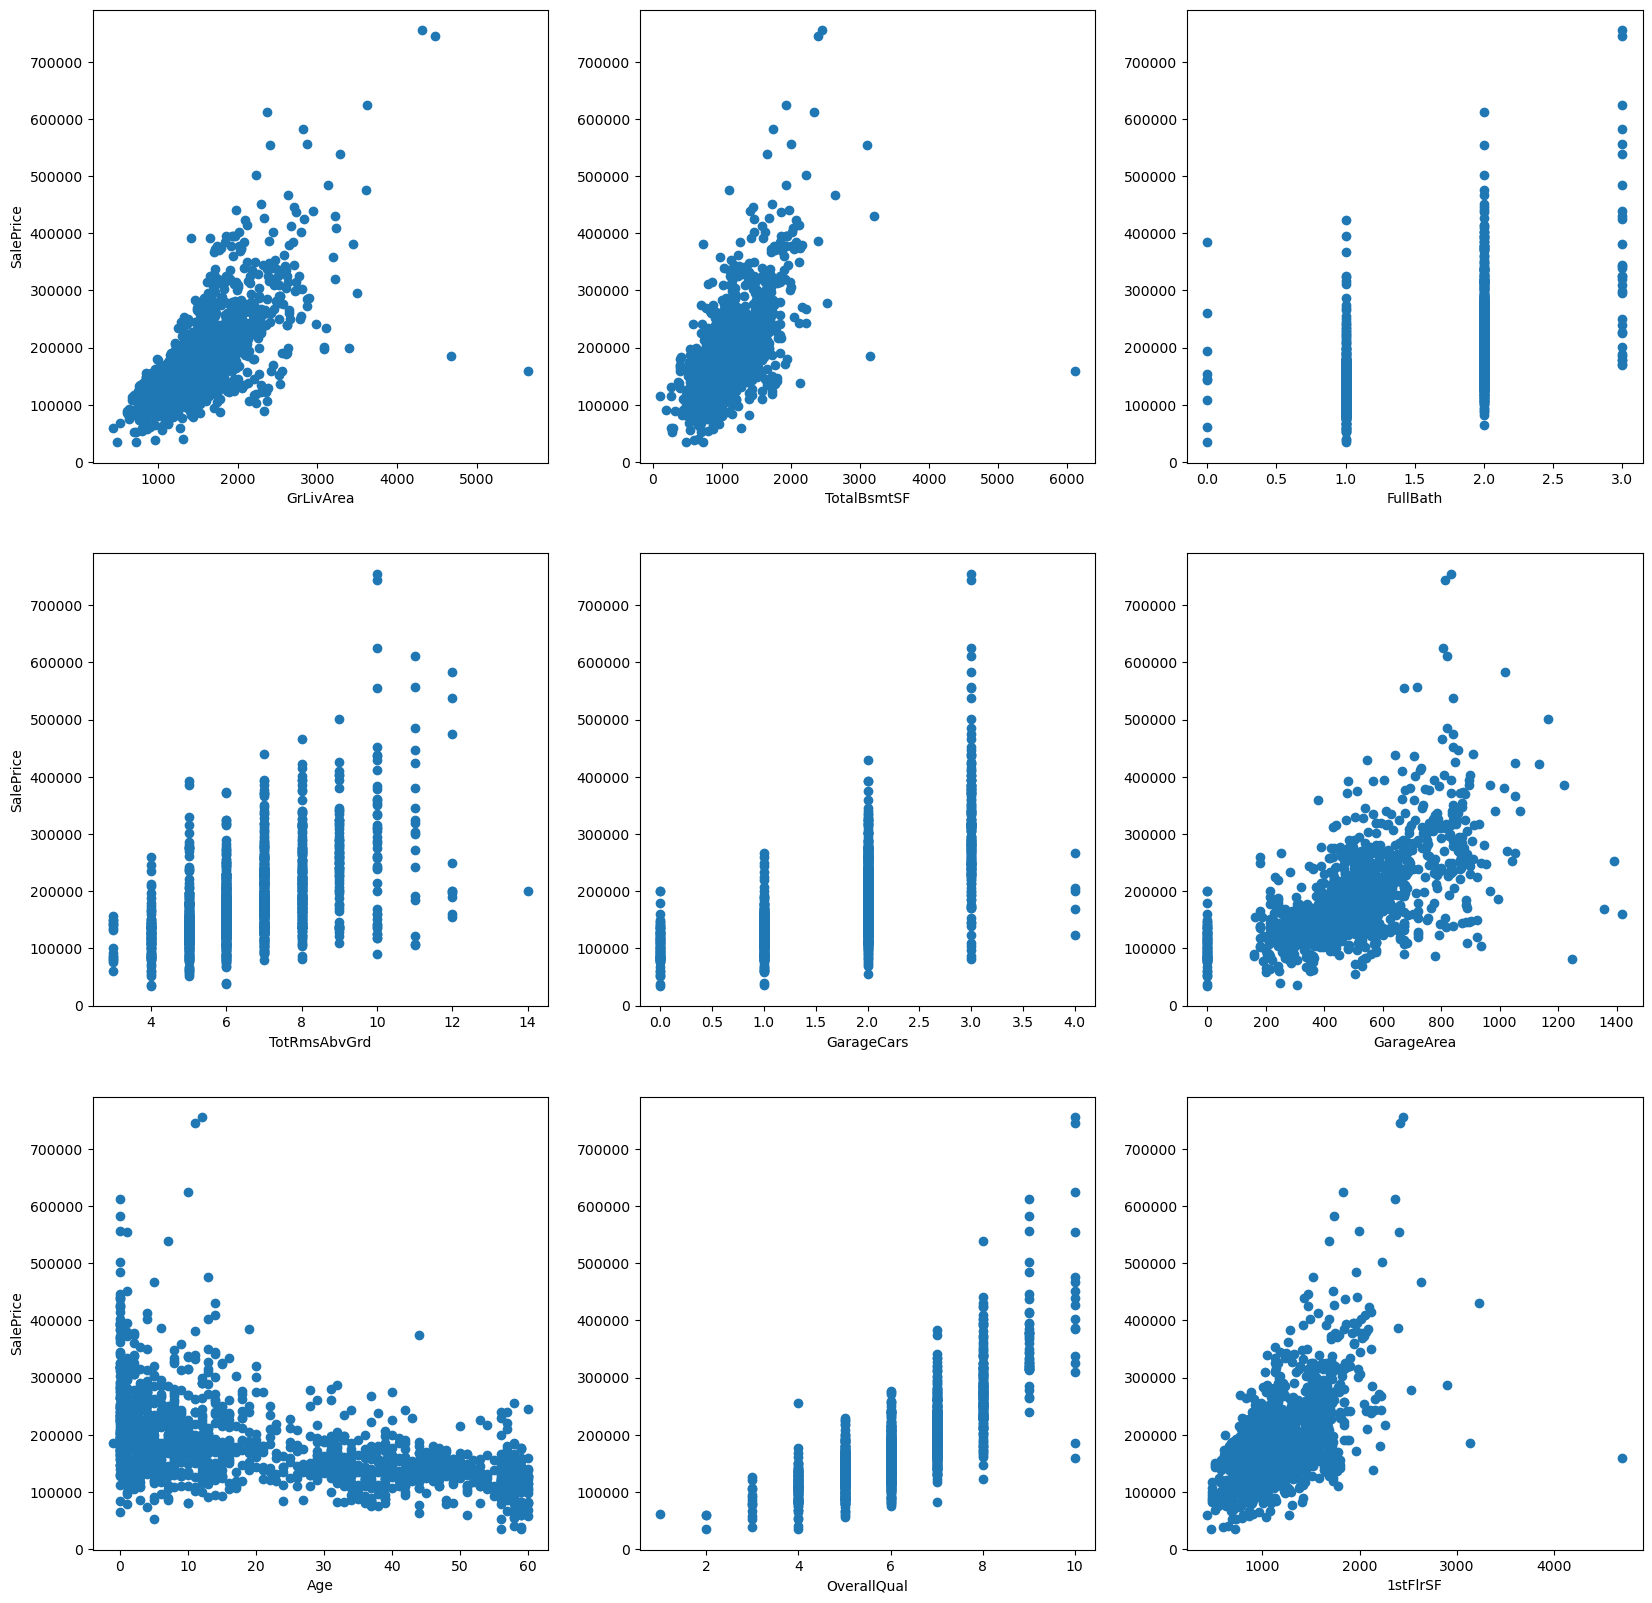

In [50]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(surprise_house_price.GrLivArea, surprise_house_price.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(surprise_house_price.TotalBsmtSF, surprise_house_price.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(surprise_house_price.FullBath, surprise_house_price.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(surprise_house_price.TotRmsAbvGrd, surprise_house_price.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(surprise_house_price.GarageCars, surprise_house_price.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(surprise_house_price.GarageArea, surprise_house_price.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(surprise_house_price.Age, surprise_house_price.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(surprise_house_price.OverallQual, surprise_house_price.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(surprise_house_price['1stFlrSF'], surprise_house_price.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()


Inferences :

We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics.

## Categorical columns of our data set

In [51]:
cat_feats  = surprise_house_price.dtypes[surprise_house_price.dtypes == "object"].index
cat_feats  

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

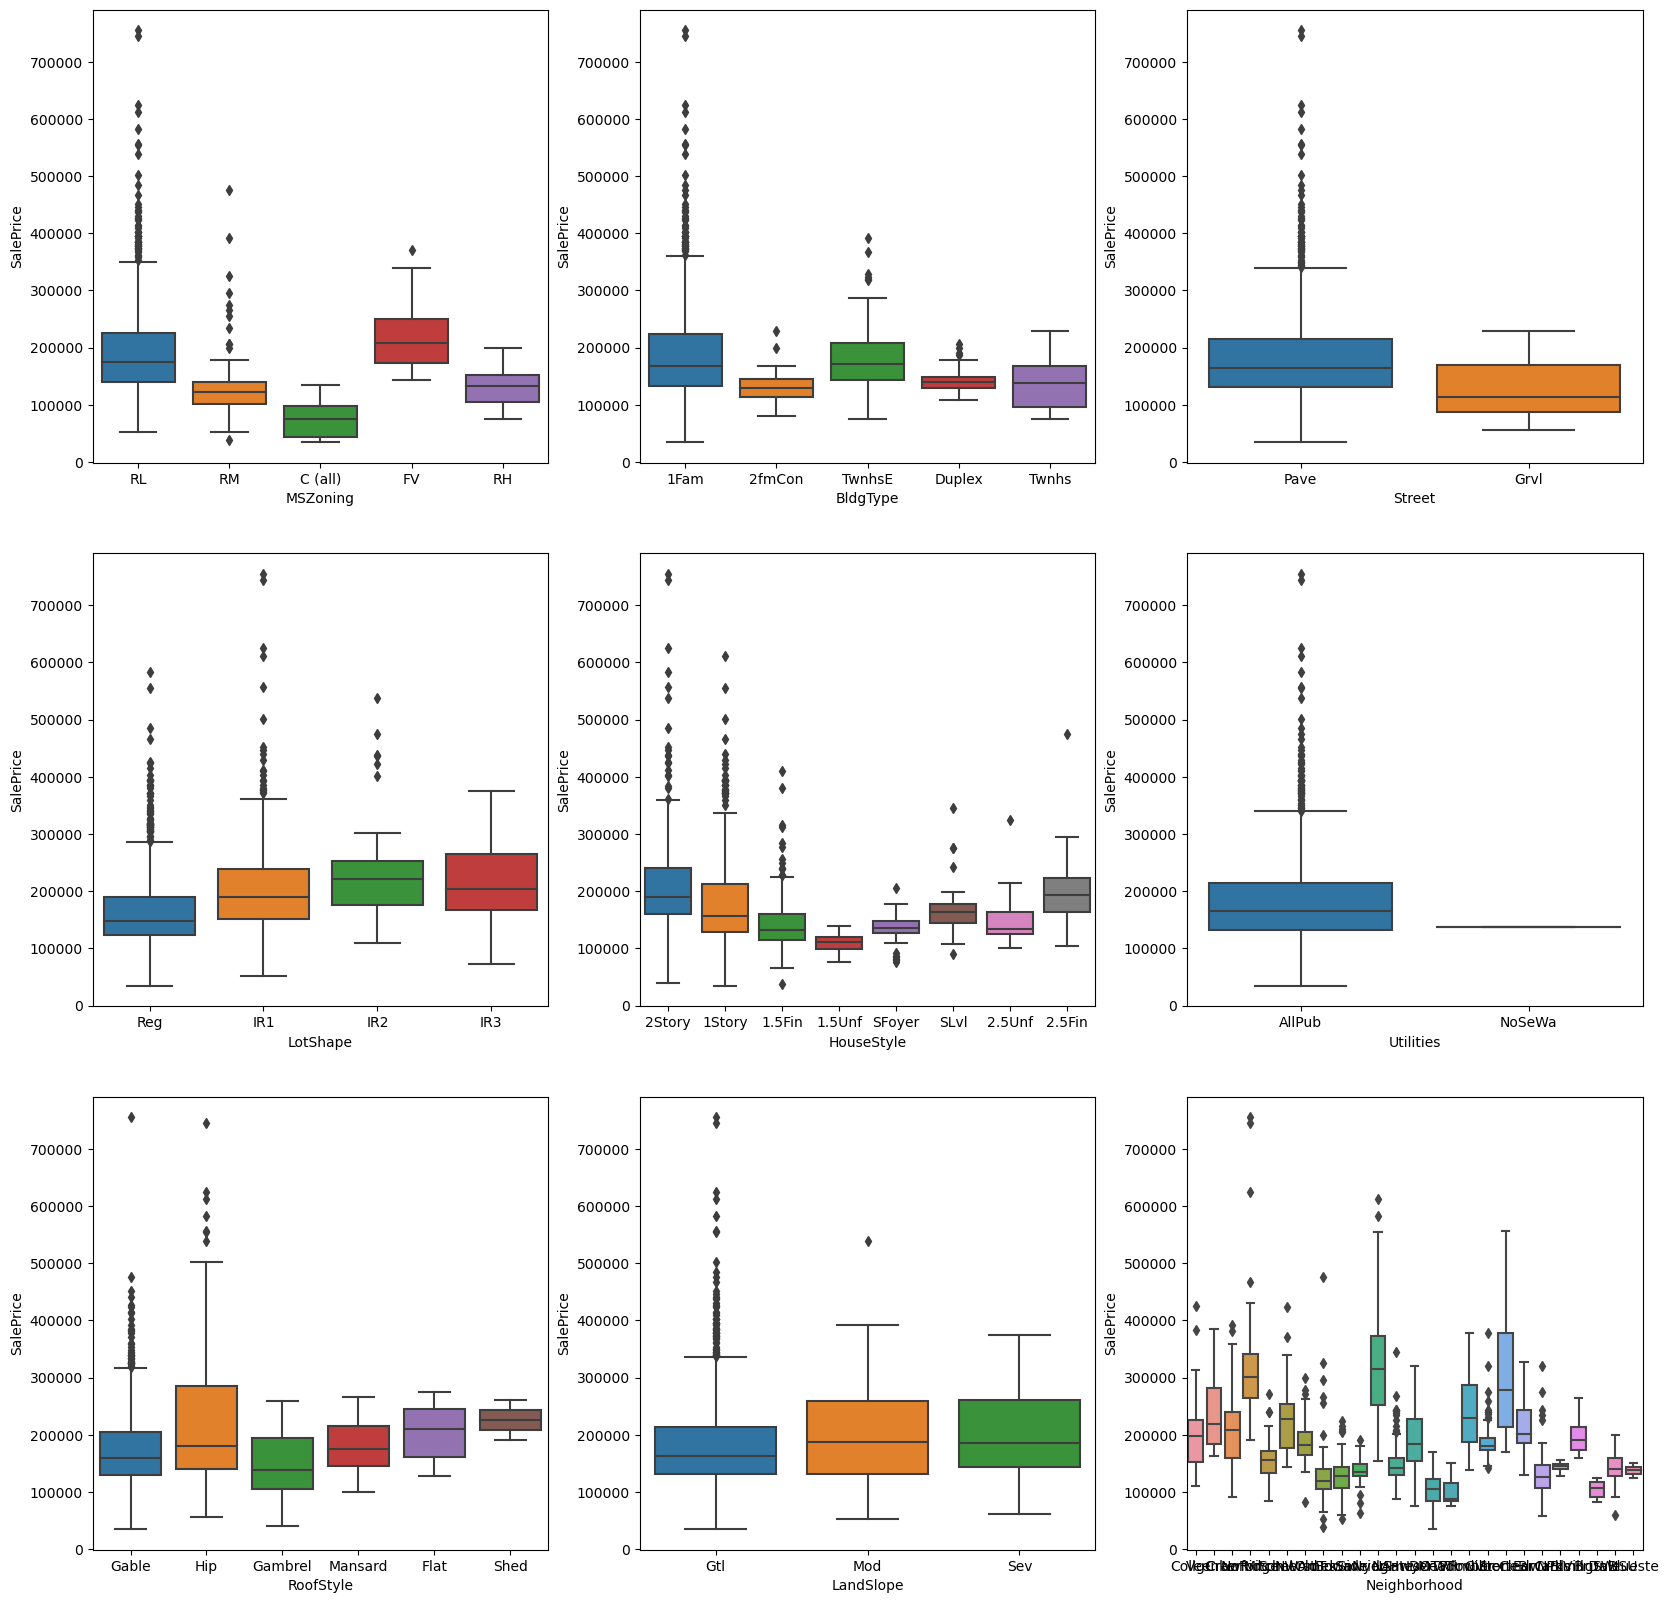

In [52]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=surprise_house_price)
plt.show()

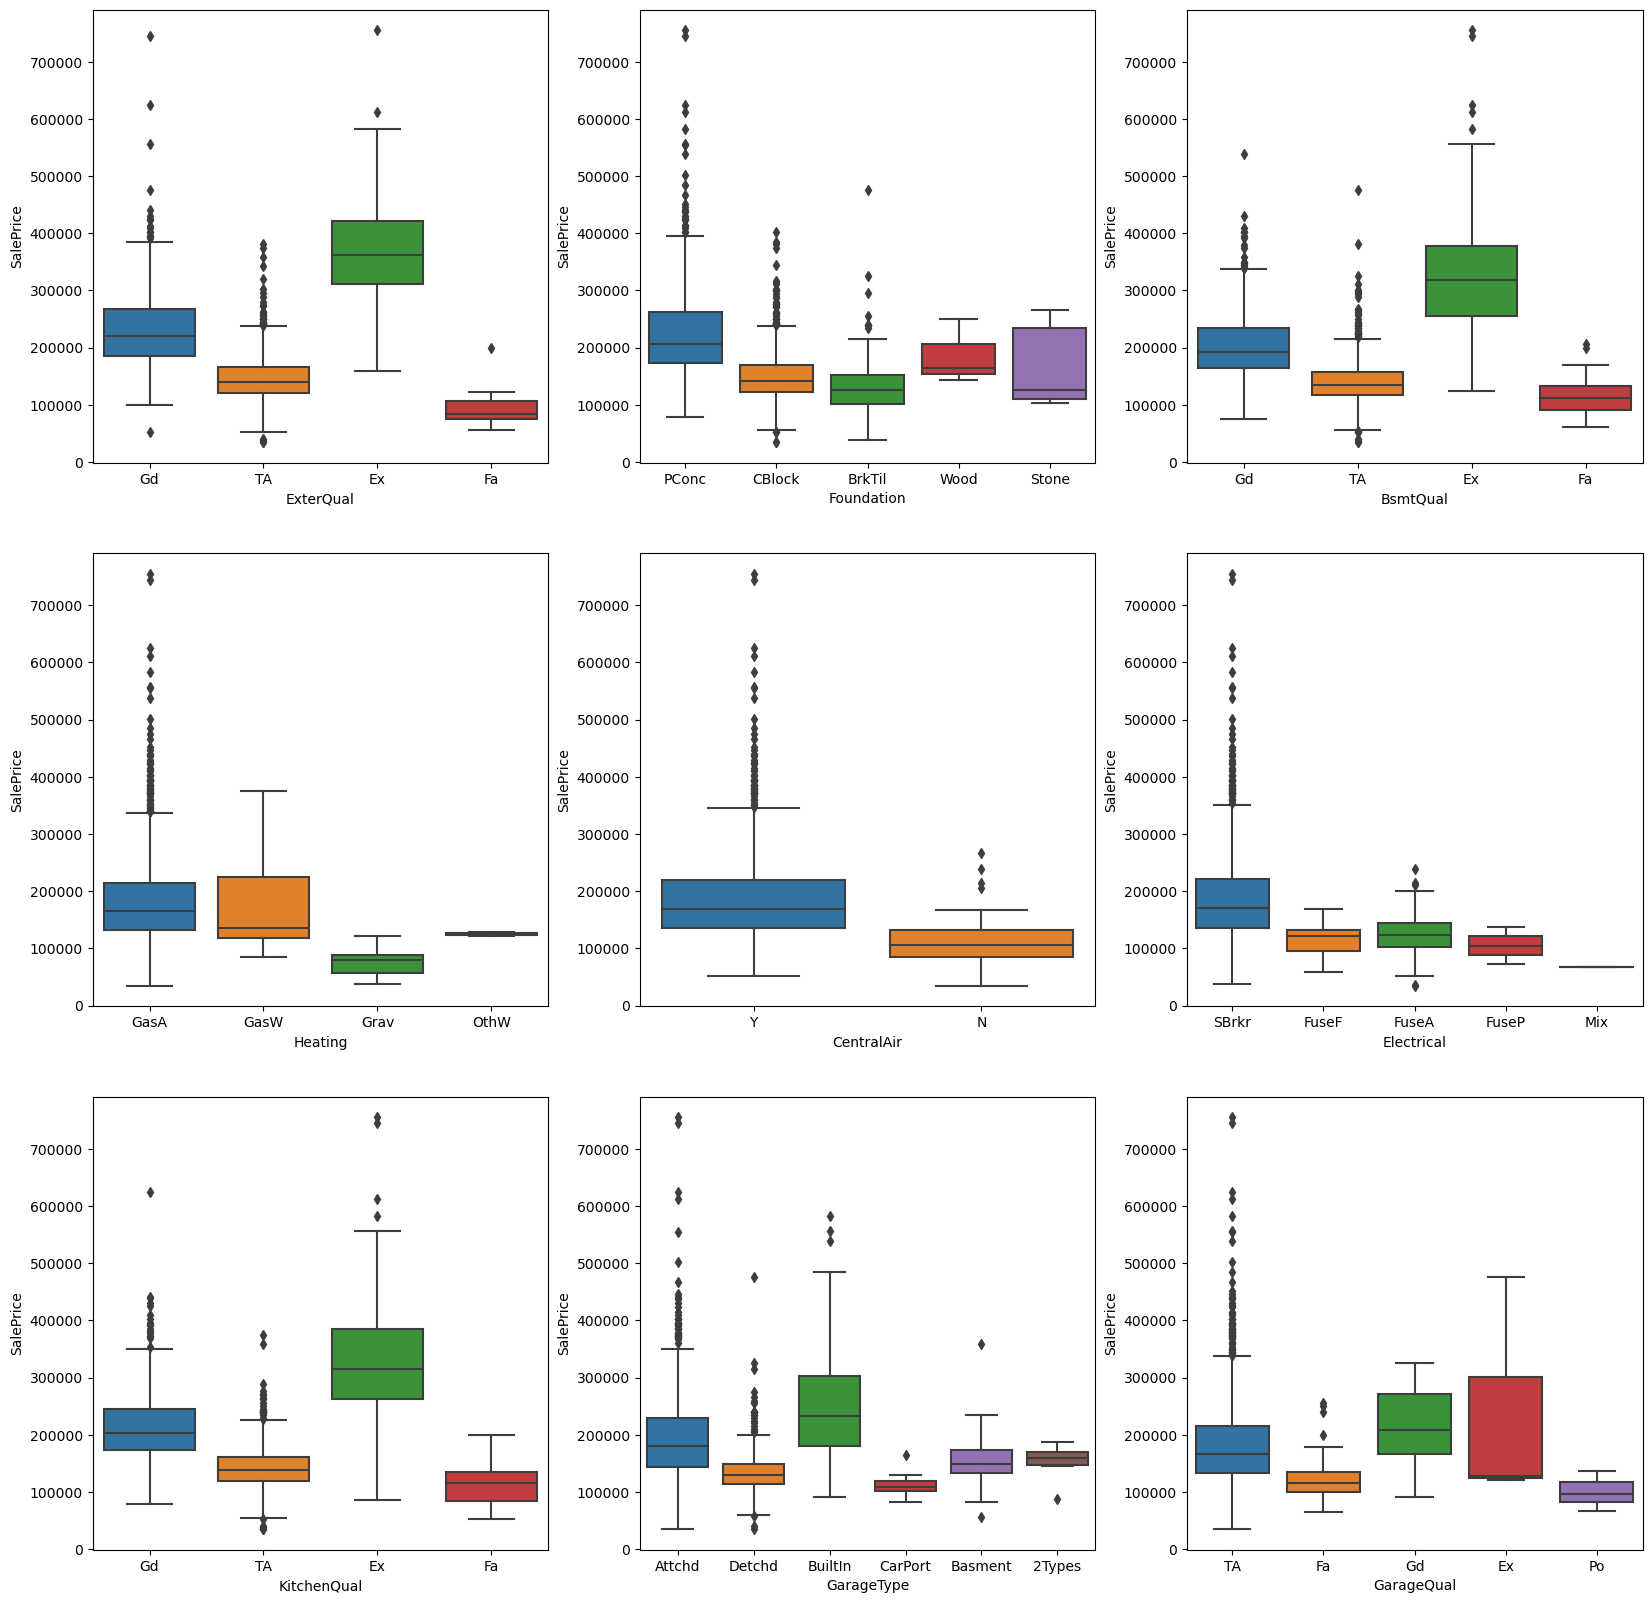

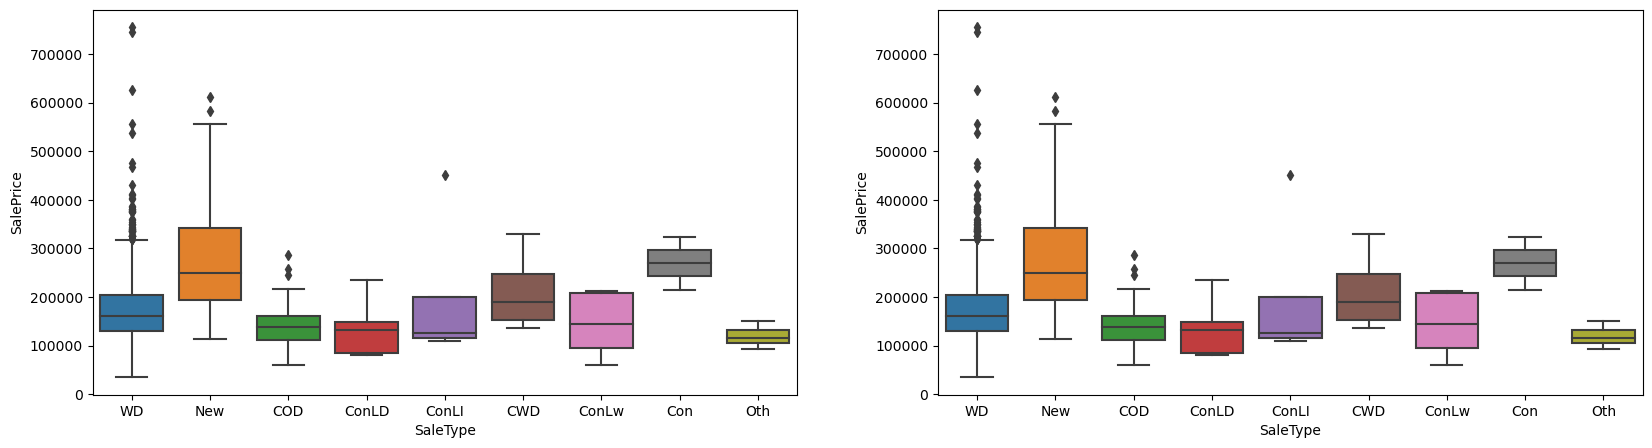

In [53]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=surprise_house_price)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=surprise_house_price)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=surprise_house_price)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=surprise_house_price)
plt.show()

Inferences -

MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
The house with Exterior Quality of type Execellent has the highest SalePrice.
The house with Basement Quality of type Execellent has the highest SalePrice.
The house with Kitchen Quality of type Execellent has the highest SalePrice.
The house with Garage Quality of type Execellent has the highest SalePrice.
The house with Garage Type of type BuiltIn has the highest SalePrice.
The house with Sale Type of type New has the highest SalePrice.
The Central air of type 'Yes' has more Sale Price when compared to 'No'

##  Data Preprocessing - Tranforming the Target variable(SalePrice

Target variable
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [54]:
surprise_house_price['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

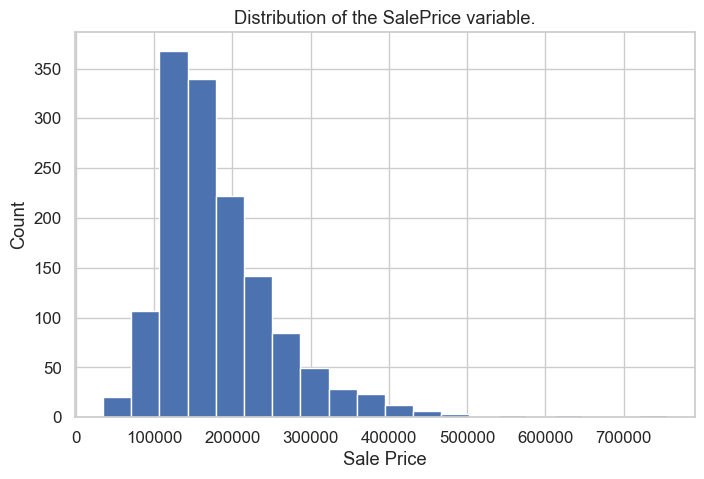

In [55]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(surprise_house_price['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show

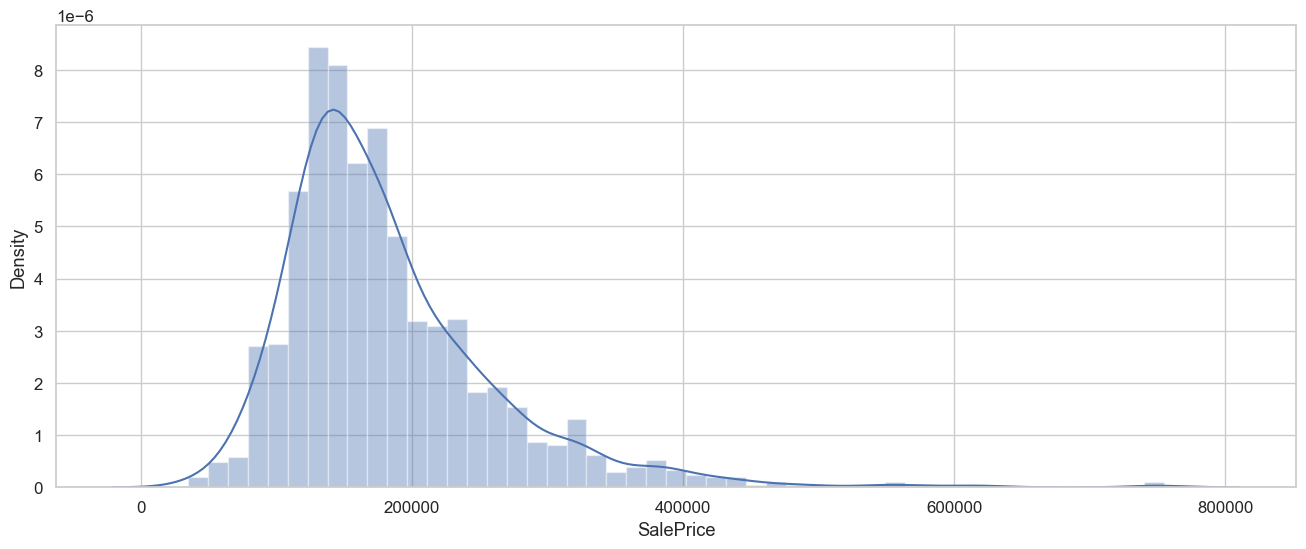

In [56]:
plt.figure(figsize=(16,6))
sns.distplot(surprise_house_price.SalePrice)
plt.show()


 mu = 182507.02 and sigma = 79242.34



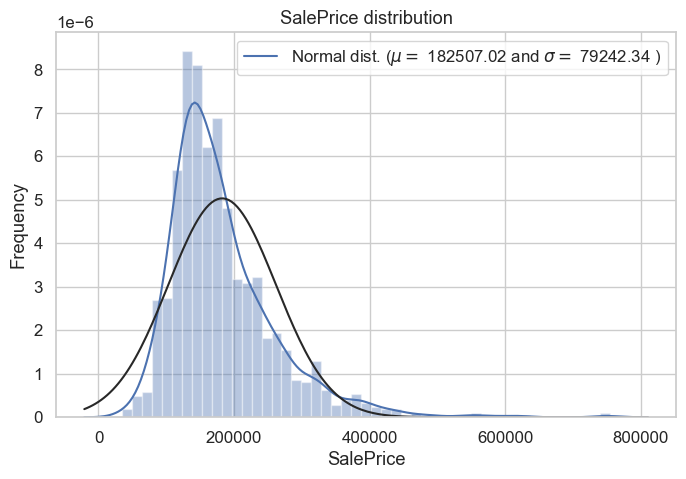

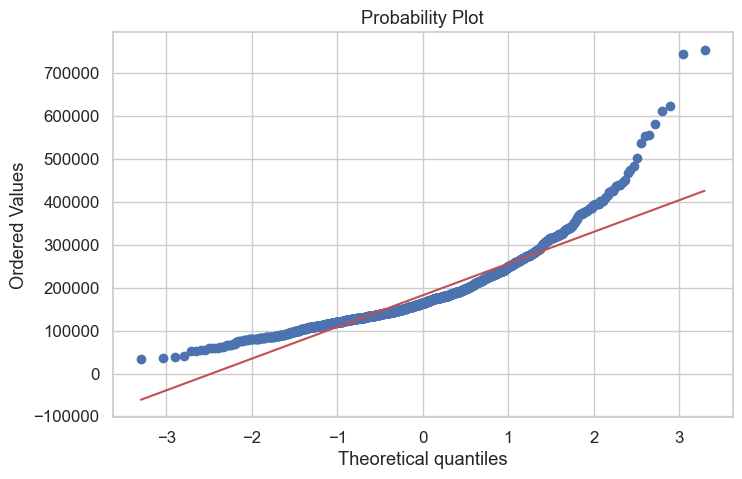

In [57]:
sns.distplot(surprise_house_price['SalePrice'] ,fit= norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(surprise_house_price['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(surprise_house_price['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.We need to transform this variable and make it normally distributed so using log tranformation method


 mu = 12.03 and sigma = 0.39



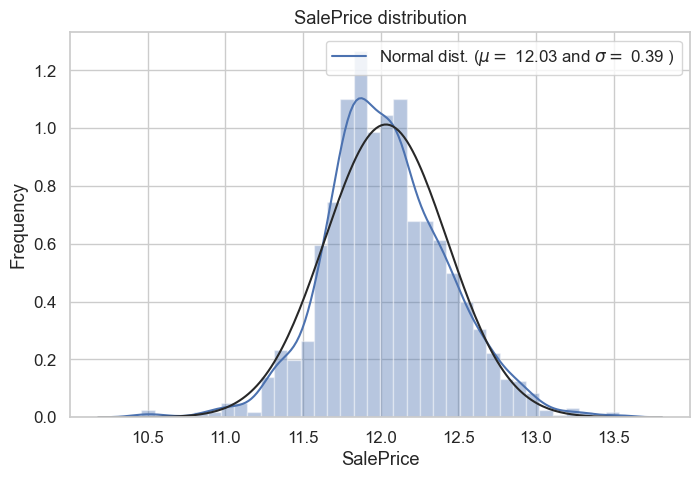

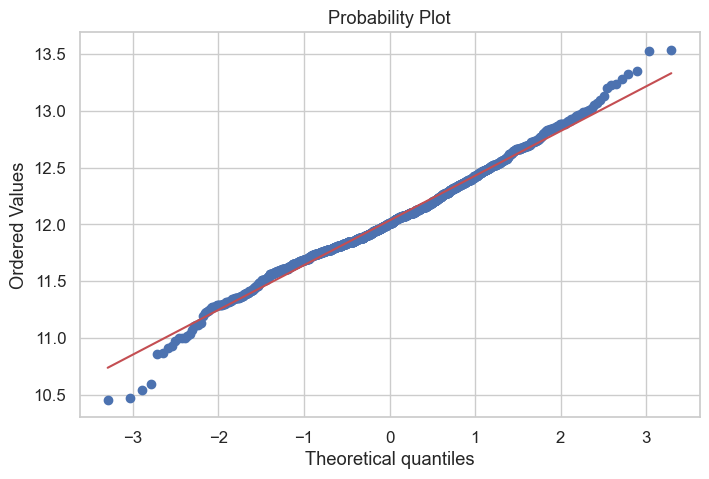

In [58]:
#We use the numpy function log to all elements of the column
surprise_house_price["SalePrice"] = np.log(surprise_house_price["SalePrice"])

#Checking the new distribution 
sns.distplot(surprise_house_price['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(surprise_house_price['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(surprise_house_price['SalePrice'], plot=plt)
plt.show()

### Data Preprocessing - Manual Encoding few categorical variables

In [59]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

In [60]:
surprise_house_price['ExterQual'] = surprise_house_price[['ExterQual']].apply(map_function)
surprise_house_price['ExterCond'] =surprise_house_price[['ExterCond']].apply(map_function)
surprise_house_price['BsmtQual'] = surprise_house_price[['BsmtQual']].apply(map_function)
surprise_house_price['BsmtCond'] = surprise_house_price[['BsmtCond']].apply(map_function)
surprise_house_price['BsmtExposure'] = surprise_house_price[['BsmtExposure']].apply(map_function1)
surprise_house_price['BsmtFinType1'] = surprise_house_price[['BsmtFinType1']].apply(map_function2)
surprise_house_price['BsmtFinType2'] = surprise_house_price[['BsmtFinType2']].apply(map_function2)
surprise_house_price['HeatingQC'] = surprise_house_price[['HeatingQC']].apply(map_function)
surprise_house_price['CentralAir'] = surprise_house_price[['CentralAir']].apply(map_function3)
surprise_house_price['KitchenQual'] = surprise_house_price[['KitchenQual']].apply(map_function)
surprise_house_price['Functional'] = surprise_house_price[['Functional']].apply(map_function4)
surprise_house_price['GarageFinish'] = surprise_house_price[['GarageFinish']].apply(map_function5)
surprise_house_price['GarageQual'] = surprise_house_price[['GarageQual']].apply(map_function)
surprise_house_price['GarageCond'] = surprise_house_price[['GarageCond']].apply(map_function)
surprise_house_price['PavedDrive'] = surprise_house_price[['PavedDrive']].apply(map_function6)

onveerting the columns MSSubClass as categorical as it is a categorical col and not numerical

In [61]:
surprise_house_price['MSSubClass']=surprise_house_price['MSSubClass'].astype('object')

In [62]:
cat_feats  = surprise_house_price.dtypes[surprise_house_price.dtypes == "object"].index
cat_feats

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [63]:
#Final check of missing values 
Total_missing = surprise_house_price.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*surprise_house_price.isnull().sum()/surprise_house_price.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
MSSubClass,0,0.0
MSZoning,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
...,...,...
ExterQual,0,0.0
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0


### Data Preprocessing - Dummy creation for remaining categorical variables

In [64]:
dummy = pd.get_dummies(surprise_house_price[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
# Adding the results back to the cleaned dataframe
surprise_house_price = pd.concat([surprise_house_price, dummy], axis=1)
surprise_house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [66]:
# Dropping the columns whose dummies have been created
surprise_house_price=surprise_house_price.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [67]:
surprise_house_price.shape

(1412, 202)

In [68]:
#Final check of missing values 
Total_missing = surprise_house_price.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*surprise_house_price.isnull().sum()/surprise_house_price.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
LotFrontage,0,0.0
RoofMatl_Roll,0,0.0
HouseStyle_SFoyer,0,0.0
HouseStyle_SLvl,0,0.0
RoofStyle_Gable,0,0.0
...,...,...
LandContour_HLS,0,0.0
LandContour_Low,0,0.0
LandContour_Lvl,0,0.0
Utilities_NoSeWa,0,0.0


## Data Modeling -Test Train spliting

In [69]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(surprise_house_price, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(988, 202)
(424, 202)


In [70]:
# display the first five rows of train dataframe
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,4,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
211,83.0,10420,6,5,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
550,53.0,4043,6,6,0.0,3,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
640,62.0,12677,8,5,472.0,5,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
1113,66.0,8923,5,7,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [71]:
# display the first five rows of test dataframe
house_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
512,70.0,9100,5,5,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,0.0,3,4,3,3,1,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,6,7,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
888,95.0,15865,8,6,0.0,4,4,3,4,4,...,0,0,0,0,1,0,0,0,1,0


In [72]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [73]:
y_test=house_test.pop('SalePrice')
X_test=house_test

## Data Modeling - Scaling

In [74]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [75]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [76]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.463225,0.521508,0.521930,0.670715,0.224696,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.189495,0.089920,0.224755,0.097159,0.351106,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,0.666667,0.500000,0.666667,0.666667,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [78]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

## Data Modeling - RFE Technique

In [79]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [80]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.41797388e-01  5.70001427e-01  3.86681052e-01  2.21819503e-01
  3.44788452e-02  2.04354377e-02 -7.12436352e-02  2.84753369e-02
  1.31630170e-02  3.25005410e-02  2.29166693e-02 -3.54969623e+10
 -2.25260132e-02 -2.49630355e+10 -3.95614999e+10  5.24156003e+10
  3.63562473e-02  7.54746962e-02 -1.47186226e+11 -1.08938909e+11
 -3.01758141e+10  2.13024366e+11  8.16900069e-02  6.18303972e-03
  9.30233137e-02  6.18657040e-02 -5.56176405e-02 -1.19357596e-01
  4.51722183e-02  2.56422032e-02  1.26820928e-01  6.65977622e-02
  5.56926101e-03  2.31610386e-02  1.27661367e-01  8.81038154e-02
  2.18347218e-01 -6.51390436e-02 -7.68939934e-03  6.39366573e-02
  9.72925920e-03  1.48865062e-02  4.77368220e-02  9.19472847e-02
  9.58456330e-02 -1.18794781e-02 -4.96579184e-02 -7.33119616e-02
  2.45164402e-02 -3.32500415e-01 -1.51726837e-02 -4.25835111e-02
 -4.27427788e-02 -1.73992069e-01 -1.36606026e-01 -5.84053319e-02
  2.34959753e+10 -5.35869584e-02 -1.40189995e-01 -1.15910823e-01
 -1.27991903e-01  5.23002

In [81]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, step=90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True False False False False False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True False False  True False False  True False False False  True  True
  True False False False False False False  True False False False False
 False  True False False False  True  True False  True False  True False
 False  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
 False False False False  True False False False False False False  True
 False False False False  True False False False False False False False
 False False False  True  True  True  True  True  True  True False  True
 False False  True False False  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  T

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenAbvGr', 'Functional', 'GarageCars', 'GarageArea', 'GarageQual',
       'ScreenPorch', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Utilities_NoSeWa',
       'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_MeadowV',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Roo

In [83]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'BsmtHalfBath',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=101)

In [84]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [85]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_New,SaleType_Oth,SaleCondition_Alloca
53,1.0,0.160959,0.228895,0.888889,0.500,0.863550,0.0,0.013699,0.561228,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
211,1.0,0.212329,0.042628,0.555556,0.500,0.017176,0.0,0.503425,0.357674,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
550,1.0,0.109589,0.012821,0.555556,0.625,0.266698,0.0,0.218322,0.311470,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.140411,0.053177,0.777778,0.500,0.581107,0.0,0.128425,0.456543,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,1.0,0.154110,0.035631,0.444444,0.750,0.306775,0.0,0.156250,0.291761,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:45:18   Log-Likelihood:                 792.52
No. Observations:                 988   AIC:                            -1399.
Df Residuals:                     895   BIC:                            -943.7
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.2838 

In [87]:
# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i)for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.64
2,LotArea,2.07
3,OverallQual,3.35
4,OverallCond,1.47
...,...,...
96,GarageType_CarPort,1.96
97,GarageType_Detchd,15.34
98,SaleType_New,1.35
99,SaleType_Oth,1.02


#### The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.

#### Though the accuracy the good it has many features and highly collinear

In [88]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [89]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,...,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_New,SaleType_Oth,SaleCondition_Alloca
53,0.160959,0.228895,0.888889,0.500,0.863550,0.0,0.013699,0.561228,1.0,0.503226,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.017176,0.0,0.503425,0.357674,1.0,0.277419,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.266698,0.0,0.218322,0.311470,1.0,0.226165,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.581107,0.0,0.128425,0.456543,1.0,0.387097,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.306775,0.0,0.156250,0.291761,1.0,0.204301,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,0.374046,0.0,0.000000,0.219386,1.0,0.124014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.270548,0.041483,0.555556,0.500,0.233779,0.0,0.400257,0.426494,1.0,0.353763,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
360,0.164384,0.029166,0.555556,0.625,0.368798,0.0,0.049229,0.252989,1.0,0.169892,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.037671,0.014957,0.555556,0.500,0.572996,0.0,0.015411,0.365751,1.0,0.322222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Modeling - Advanced Regression

Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

## Ridge Regression mode

In [90]:
# Lets assume alpha is 0.001 and build a Ridge regression model

ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9233080129230253


### Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [91]:


# Tune hyperparameter
params = {'alpha': [0.001,0.01,0.5,1.0,10,50,100,500,1000]}

# Build Model using Ridge regression
ridge = Ridge()

# Cross Validation 
folds = 5 
model_cv = GridSearchCV(estimator = ridge ,
                         param_grid = params ,
                         scoring = 'neg_mean_absolute_error',
                         cv = folds ,
                         return_train_score = True ,
                         verbose =1 )
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006166,0.003276,0.002885,0.003049,0.001,{'alpha': 0.001},-0.102371,-0.093531,-0.092016,-0.081635,...,-0.092833,0.006644,4,-0.076593,-0.078421,-0.076147,-0.080967,-0.076934,-0.077812,0.001752
1,0.007723,0.001287,0.003186,0.003566,0.01,{'alpha': 0.01},-0.102143,-0.093250,-0.091806,-0.081523,...,-0.092556,0.006587,3,-0.076636,-0.078409,-0.076201,-0.081062,-0.077058,-0.077873,0.001758
2,0.006377,0.002758,0.002673,0.002410,0.5,{'alpha': 0.5},-0.098106,-0.091054,-0.091243,-0.079197,...,-0.090211,0.006115,2,-0.078656,-0.079683,-0.078185,-0.082730,-0.079457,-0.079742,0.001588
3,0.012609,0.002844,0.000000,0.000000,1.0,{'alpha': 1.0},-0.097550,-0.091243,-0.091043,-0.079135,...,-0.089993,0.005978,1,-0.079684,-0.080540,-0.079415,-0.083720,-0.080673,-0.080807,0.001535
4,0.008666,0.006121,0.005527,0.006025,10,{'alpha': 10},-0.107499,-0.101172,-0.100534,-0.085935,...,-0.098199,0.007165,5,-0.092033,-0.092714,-0.091774,-0.095384,-0.093542,-0.093090,0.001301
5,0.012752,0.006407,0.003001,0.006003,50,{'alpha': 50},-0.147599,-0.139534,-0.135477,-0.120546,...,-0.135185,0.008869,6,-0.130597,-0.131102,-0.130938,-0.133411,-0.132075,-0.131624,0.001019
6,0.006597,0.007473,0.003218,0.006437,100,{'alpha': 100},-0.174824,-0.163875,-0.162710,-0.144684,...,-0.161664,0.009673,7,-0.157281,-0.158220,-0.157900,-0.160830,-0.158720,-0.158590,0.001213
7,0.011871,0.003717,0.003817,0.002854,500,{'alpha': 500},-0.236143,-0.219346,-0.225866,-0.203671,...,-0.223432,0.011406,8,-0.218413,-0.222782,-0.221953,-0.224092,-0.221004,-0.221649,0.001909
8,0.004502,0.003716,0.003198,0.003917,1000,{'alpha': 1000},-0.260697,-0.245605,-0.251432,-0.227656,...,-0.248687,0.011757,9,-0.243947,-0.248357,-0.247707,-0.250291,-0.246616,-0.247384,0.002093


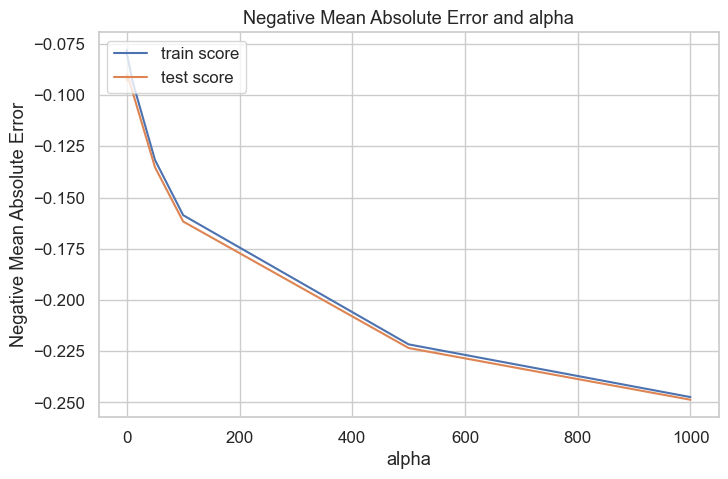

In [93]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We se that alpha is somewhere between 0- 20 So sleting parameters according to that.

In [94]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004067,0.004367,0.005675,0.003681,0.001,{'alpha': 0.001},-0.102371,-0.093531,-0.092016,-0.081635,...,-0.092833,0.006644,7,-0.076593,-0.078421,-0.076147,-0.080967,-0.076934,-0.077812,0.001752
1,0.005065,0.006743,0.011107,0.006229,0.01,{'alpha': 0.01},-0.102143,-0.093250,-0.091806,-0.081523,...,-0.092556,0.006587,5,-0.076636,-0.078409,-0.076201,-0.081062,-0.077058,-0.077873,0.001758
2,0.013327,0.002797,0.001301,0.002602,1.0,{'alpha': 1.0},-0.097550,-0.091243,-0.091043,-0.079135,...,-0.089993,0.005978,1,-0.079684,-0.080540,-0.079415,-0.083720,-0.080673,-0.080807,0.001535
3,0.010944,0.003956,0.001602,0.003204,2.0,{'alpha': 2.0},-0.097543,-0.091843,-0.091674,-0.079471,...,-0.090302,0.005907,2,-0.081430,-0.082250,-0.081251,-0.085204,-0.082446,-0.082516,0.001420
4,0.006037,0.005143,0.003455,0.006910,3.0,{'alpha': 3.0},-0.098376,-0.092820,-0.092693,-0.080048,...,-0.091024,0.006009,3,-0.082962,-0.083804,-0.082742,-0.086506,-0.083955,-0.083994,0.001340
5,0.006315,0.007735,0.006266,0.007674,4.0,{'alpha': 4.0},-0.099407,-0.093715,-0.093638,-0.080690,...,-0.091779,0.006139,4,-0.084274,-0.085151,-0.084159,-0.087812,-0.085419,-0.085363,0.001318
6,0.009558,0.007805,0.000000,0.000000,5.0,{'alpha': 5.0},-0.100582,-0.094913,-0.094585,-0.081400,...,-0.092699,0.006305,6,-0.085583,-0.086416,-0.085506,-0.089075,-0.086816,-0.086679,0.001297
7,0.003002,0.006004,0.003304,0.006609,6.0,{'alpha': 6.0},-0.101948,-0.096200,-0.095601,-0.082177,...,-0.093724,0.006507,8,-0.086875,-0.087662,-0.086796,-0.090312,-0.088169,-0.087963,0.001280
8,0.012570,0.006286,0.003155,0.006310,7.0,{'alpha': 7.0},-0.103307,-0.097519,-0.096754,-0.083023,...,-0.094791,0.006699,9,-0.088207,-0.088918,-0.088041,-0.091508,-0.089532,-0.089241,0.001252
9,0.009436,0.007705,0.003123,0.006246,8.0,{'alpha': 8.0},-0.104722,-0.098770,-0.098061,-0.083910,...,-0.095925,0.006892,10,-0.089499,-0.090178,-0.089299,-0.092823,-0.090889,-0.090538,0.001272


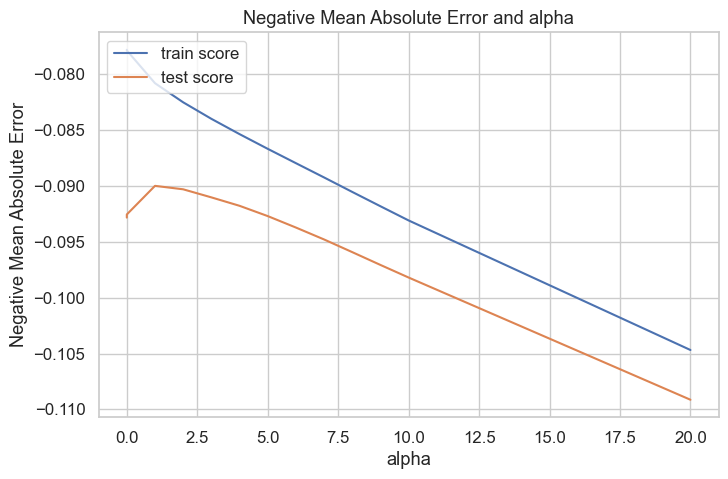

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [98]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score {0} is obtained at alpha {1}".format(best_ridge_score , best_ridge_alpha))

Ridge()
 The best r2 score -0.08999280476882404 is obtained at alpha 1.0


### Building ridge regression model with optimal alpha value

In [99]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [100]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [101]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.116167,10.116167
3,OverallCond,0.655040,0.655040
13,BsmtFinSF2,0.426172,0.426172
10,BsmtFinType1,0.363110,0.363110
11,BsmtFinSF1,0.339782,0.339782
27,KitchenAbvGr,0.331734,0.331734
2,OverallQual,0.326209,0.326209
61,MSZoning_FV,-0.294202,0.294202
8,BsmtCond,0.273548,0.273548
29,TotRmsAbvGrd,0.268702,0.268702


In [102]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9186
Ridge regression test r2:  0.7338


## Lasso Regression model

In [103]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056975,0.010205,0.006206,0.001963,0.0001,{'alpha': 0.0001},-0.095793,-0.090219,-0.091754,-0.080013,...,-0.089877,0.005271,1,-0.079007,-0.079945,-0.078426,-0.083560,-0.079959,-0.080179,0.001788
1,0.009154,0.007485,0.006249,0.007653,0.001,{'alpha': 0.001},-0.095034,-0.095798,-0.096017,-0.079742,...,-0.092253,0.006275,2,-0.087184,-0.088143,-0.087744,-0.091844,-0.088150,-0.088613,0.001653
2,0.011744,0.006933,0.000000,0.000000,0.01,{'alpha': 0.01},-0.131697,-0.131914,-0.129368,-0.105476,...,-0.125622,0.010126,3,-0.124043,-0.123418,-0.122990,-0.124740,-0.122040,-0.123446,0.000918
3,0.003284,0.004022,0.007950,0.007062,0.05,{'alpha': 0.05},-0.289374,-0.278658,-0.282287,-0.257188,...,-0.279791,0.012216,4,-0.274504,-0.279337,-0.278789,-0.281054,-0.276518,-0.278040,0.002287
4,0.009687,0.007930,0.006292,0.007706,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


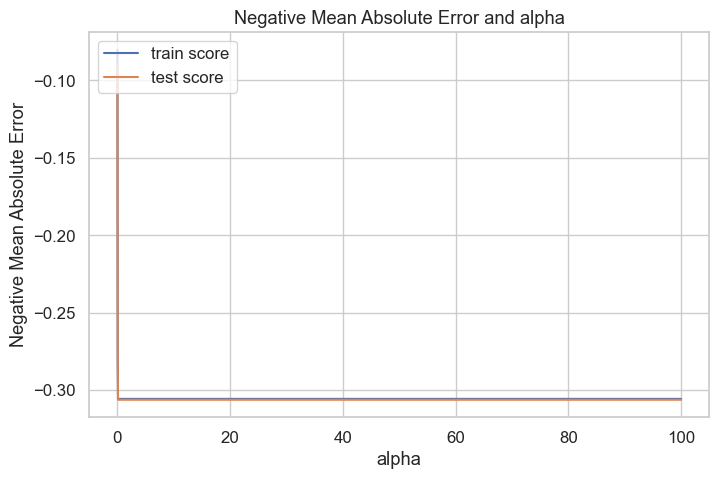

In [105]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

This graphs shows that alpha value might be ver less than 1

In [106]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014083,0.002846,0.001779,0.002174,0.001,{'alpha': 0.001},-0.095034,-0.095798,-0.096017,-0.079742,...,-0.092253,0.006275,1,-0.087184,-0.088143,-0.087744,-0.091844,-0.088150,-0.088613,0.001653
1,0.011147,0.005908,0.003140,0.006280,0.01,{'alpha': 0.01},-0.131697,-0.131914,-0.129368,-0.105476,...,-0.125622,0.010126,2,-0.124043,-0.123418,-0.122990,-0.124740,-0.122040,-0.123446,0.000918
2,0.013060,0.008628,0.002907,0.003671,0.05,{'alpha': 0.05},-0.289374,-0.278658,-0.282287,-0.257188,...,-0.279791,0.012216,3,-0.274504,-0.279337,-0.278789,-0.281054,-0.276518,-0.278040,0.002287
3,0.009460,0.007726,0.003125,0.006250,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029
4,0.007535,0.007042,0.004012,0.006217,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


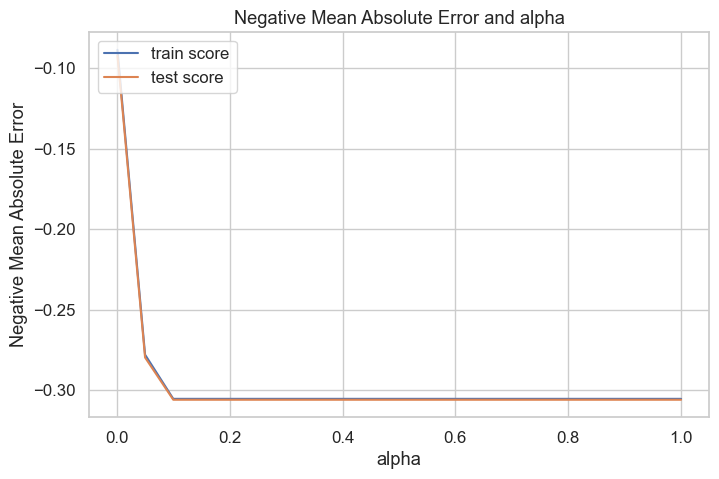

In [108]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

Tunning it more

In [110]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069950,0.008823,0.006373,0.005890,0.0001,{'alpha': 0.0001},-0.095793,-0.090219,-0.091754,-0.080013,...,-0.089877,0.005271,1,-0.079007,-0.079945,-0.078426,-0.083560,-0.079959,-0.080179,0.001788
1,0.013938,0.008410,0.006066,0.003213,0.001,{'alpha': 0.001},-0.095034,-0.095798,-0.096017,-0.079742,...,-0.092253,0.006275,2,-0.087184,-0.088143,-0.087744,-0.091844,-0.088150,-0.088613,0.001653
2,0.007997,0.000002,0.004798,0.003917,0.01,{'alpha': 0.01},-0.131697,-0.131914,-0.129368,-0.105476,...,-0.125622,0.010126,3,-0.124043,-0.123418,-0.122990,-0.124740,-0.122040,-0.123446,0.000918
3,0.004822,0.003937,0.008037,0.007018,0.05,{'alpha': 0.05},-0.289374,-0.278658,-0.282287,-0.257188,...,-0.279791,0.012216,4,-0.274504,-0.279337,-0.278789,-0.281054,-0.276518,-0.278040,0.002287
4,0.009397,0.007673,0.006249,0.007654,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


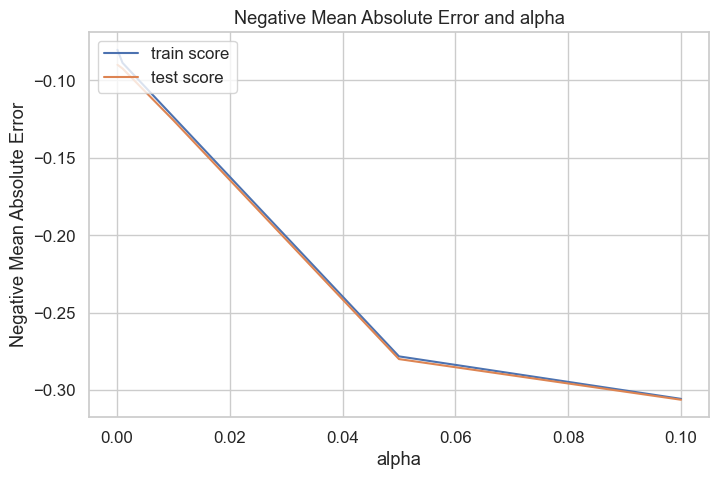

In [112]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [113]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063677,0.012742,0.004822,0.004121,0.00001,{'alpha': 1e-05},-0.102129,-0.092574,-0.091961,-0.081508,...,-0.092340,0.006554,3,-0.076969,-0.078646,-0.076579,-0.081450,-0.077397,-0.078208,0.001763
1,0.068196,0.012876,0.004014,0.006061,0.0001,{'alpha': 0.0001},-0.095793,-0.090219,-0.091754,-0.080013,...,-0.089877,0.005271,1,-0.079007,-0.079945,-0.078426,-0.083560,-0.079959,-0.080179,0.001788
2,0.015689,0.000087,0.003183,0.006366,0.001,{'alpha': 0.001},-0.095034,-0.095798,-0.096017,-0.079742,...,-0.092253,0.006275,2,-0.087184,-0.088143,-0.087744,-0.091844,-0.088150,-0.088613,0.001653
3,0.005845,0.006840,0.004739,0.006291,0.01,{'alpha': 0.01},-0.131697,-0.131914,-0.129368,-0.105476,...,-0.125622,0.010126,4,-0.124043,-0.123418,-0.122990,-0.124740,-0.122040,-0.123446,0.000918
4,0.005913,0.003454,0.004634,0.003811,0.05,{'alpha': 0.05},-0.289374,-0.278658,-0.282287,-0.257188,...,-0.279791,0.012216,5,-0.274504,-0.279337,-0.278789,-0.281054,-0.276518,-0.278040,0.002287


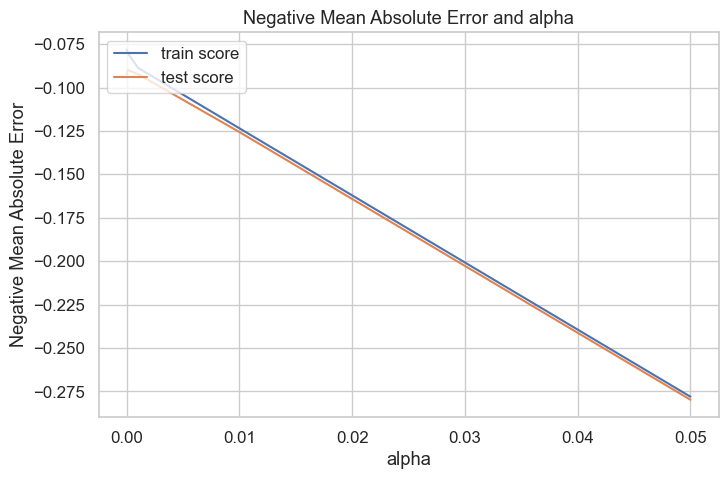

In [115]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [116]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [117]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079693,0.006438,0.005352,0.007123,0.00001,{'alpha': 1e-05},-0.102129,-0.092574,-0.091961,-0.081508,...,-0.092340,0.006554,3,-0.076969,-0.078646,-0.076579,-0.081450,-0.077397,-0.078208,0.001763
1,0.082378,0.006331,0.003170,0.006340,0.0001,{'alpha': 0.0001},-0.095793,-0.090219,-0.091754,-0.080013,...,-0.089877,0.005271,1,-0.079007,-0.079945,-0.078426,-0.083560,-0.079959,-0.080179,0.001788
2,0.010764,0.002407,0.001807,0.002108,0.001,{'alpha': 0.001},-0.095034,-0.095798,-0.096017,-0.079742,...,-0.092253,0.006275,2,-0.087184,-0.088143,-0.087744,-0.091844,-0.088150,-0.088613,0.001653


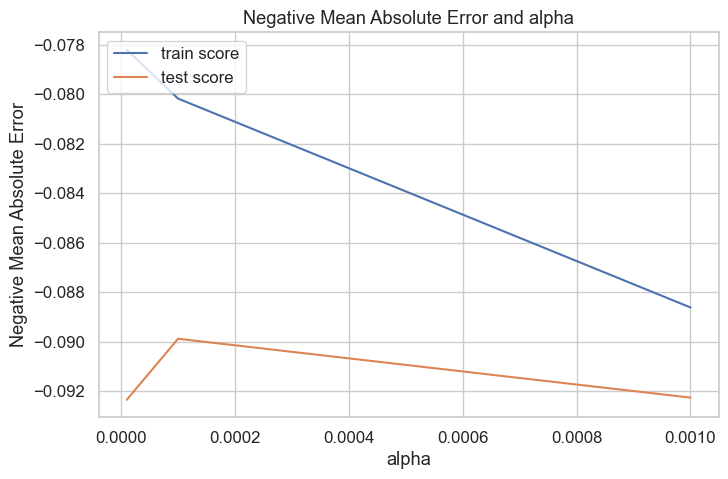

In [119]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [120]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

## Building Lasso regression model with optimal alpha value

In [121]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9201108315190754
Lasso Regression test r2: 0.7311726535237051


In [122]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [123]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.042593,10.042593
1,LotArea,0.073718,0.073718
2,OverallQual,0.483327,0.483327
3,OverallCond,0.702908,0.702908
4,BsmtFinSF1,0.245925,0.245925
...,...,...,...
95,GarageType_CarPort,0.071424,0.071424
96,GarageType_Detchd,0.031240,0.031240
97,SaleType_New,0.005238,0.005238
98,SaleType_Oth,0.077482,0.077482


In [124]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.042593,10.042593
13,BsmtFullBath,0.859076,0.859076
3,OverallCond,0.702908,0.702908
61,Exterior1st_BrkFace,-0.554576,0.554576
2,OverallQual,0.483327,0.483327
27,MSZoning_RH,0.421919,0.421919
8,CentralAir,0.406363,0.406363
29,MSZoning_RM,0.345059,0.345059
30,Street_Pave,0.279916,0.279916
18,GarageArea,0.247055,0.247055


In [125]:
lasso.coef_

array([ 0.07371807,  0.48332728,  0.70290785,  0.24592498,  0.14462502,
        0.00192193, -0.        ,  0.40636293,  0.09651954,  0.09497155,
        0.12797498, -0.02693297,  0.85907581,  0.12249113,  0.0742208 ,
       -0.18756376,  0.1252929 ,  0.24705471,  0.07365109,  0.13564783,
        0.07902781, -0.        , -0.07430273, -0.01806417, -0.02684917,
       -0.07286565,  0.42191949,  0.23555876,  0.34505881,  0.27991551,
        0.06819292, -0.00970875, -0.01241388, -0.07469228, -0.11555372,
       -0.07818318,  0.09394306,  0.07688219,  0.05839999,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.00596219,
        0.01914414,  0.09685745,  0.01981606, -0.06481261,  0.        ,
       -0.05554412, -0.02220571,  0.14350853,  0.        ,  0.14719399,
        0.        , -0.        , -0.03340062, -0.0502006 ,  0.00181099,
       -0.55457622,  0.07887466, -0.        ,  0.03228766, -0.01372465,
        0.        , -0.        , -0.        , -0.        , -0.01

## Data Modeling and evaluation - Final model

We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model

In [126]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9201108315190754
0.7311726535237051


## Model Inference and Conclusion l

The company wants to know:

Which variables are significant in predicting the price of a house:

LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

BsmtFullBath : : If the BsmtFullBath area is more the SalePrice is higher

Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

MSZoning_RH : If the house i near residential area then the SalePrice is higher

Overall quality: If the Overall Condition is Excellent the SalePrice is higher

Exterior1st_CBlock : IF the house Exterior1st is CBlock then price is less.

Garage Area: If the Garage area is high the SalePrice is higher

CentralAir: If the CentralAir is Yes the SalePrice is higher

How well those variables describe the price of a house.

These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future

### Optimal value of alpha:
For Ridge regression :1.0
For Lasso Regression :0.0001

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Optimal value of alpha:
For Ridge regression :1.0
For Lasso Regression :0.0001

In [128]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [129]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.116167,10.116167
3,OverallCond,0.655040,0.655040
13,BsmtFinSF2,0.426172,0.426172
10,BsmtFinType1,0.363110,0.363110
11,BsmtFinSF1,0.339782,0.339782
27,KitchenAbvGr,0.331734,0.331734
2,OverallQual,0.326209,0.326209
61,MSZoning_FV,-0.294202,0.294202
8,BsmtCond,0.273548,0.273548
29,TotRmsAbvGrd,0.268702,0.268702


In [130]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9150662492961033
Ridge Regression test r2: 0.7371351945366085


For Lasso regression alpha is 0.0001 and doubling it and making it 0.0002

In [133]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [134]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9163334784634766
Lasso Regression test r2: 0.7350240220130699


In [135]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.042593,10.042593
13,BsmtFullBath,0.859076,0.859076
3,OverallCond,0.702908,0.702908
61,Exterior1st_BrkFace,-0.554576,0.554576
2,OverallQual,0.483327,0.483327
27,MSZoning_RH,0.421919,0.421919
8,CentralAir,0.406363,0.406363
29,MSZoning_RM,0.345059,0.345059
30,Street_Pave,0.279916,0.279916
18,GarageArea,0.247055,0.247055
